<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Impute Missing Values**


Estimated time needed: **30** minutes


In this lab, you will practice essential data wrangling techniques using the Stack Overflow survey dataset. The primary focus is on handling missing data and ensuring data quality. You will:

- **Load the Data:** Import the dataset into a DataFrame using the pandas library.

- **Clean the Data:** Identify and remove duplicate entries to maintain data integrity.

- **Handle Missing Values:** Detect missing values, impute them with appropriate strategies, and verify the imputation to create a complete and reliable dataset for analysis.

This lab equips you with the skills to effectively preprocess and clean real-world datasets, a crucial step in any data analysis project.


## Objectives


In this lab, you will perform the following:


-   Identify missing values in the dataset.

-   Apply techniques to impute missing values in the dataset.
  
-   Use suitable techniques to normalize data in the dataset.


-----


#### Install needed library


In [1]:
!pip install pandas

### Step 1: Import Required Libraries


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load the Dataset Into a Dataframe


#### **Read Data**
<p>
The functions below will download the dataset into your browser:
</p>


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 3. Finding and Removing Duplicates
##### Task 1: Identify duplicate rows in the dataset.


In [5]:
# Identify duplicate rows in the dataset
duplicates = df[df.duplicated()]

# Display the number of duplicate rows
print(f"Number of duplicate rows: {len(duplicates)}")

# Display the duplicate rows (if any)
if not duplicates.empty:
    print("\nDuplicate rows:")
    print(duplicates)
else:
    print("\nNo duplicate rows found.")

Number of duplicate rows: 0

No duplicate rows found.


##### Task 2: Remove the duplicate rows from the dataframe.



In [6]:
# Remove duplicate rows and keep the first occurrence
df = df.drop_duplicates()


### Step 4: Finding Missing Values
##### Task 3: Find the missing values for all columns.


In [7]:
# Calculate the number of missing values for each column
missing_values = df.isnull().sum()

# Display the missing values for each column
print("Missing Values for Each Column:")
print(missing_values)

Missing Values for Each Column:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


##### Task 4: Find out how many rows are missing in the column RemoteWork.


In [8]:
# Calculate the number of missing rows in the 'RemoteWork' column
missing_remote_work = df['RemoteWork'].isnull().sum()

# Print the result
print(f"Number of missing rows in the 'RemoteWork' column: {missing_remote_work}")


Number of missing rows in the 'RemoteWork' column: 10631


### Step 5. Imputing Missing Values
##### Task 5: Find the value counts for the column RemoteWork.


In [10]:
# Calculate the value counts including NaN values
remote_work_counts_with_nan = df['RemoteWork'].value_counts(dropna=False)

# Display the value counts
print("Value counts for the 'RemoteWork' column (including NaN):")
print(remote_work_counts_with_nan)

Value counts for the 'RemoteWork' column (including NaN):
RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
NaN                                     10631
Name: count, dtype: int64


##### Task 6: Identify the most frequent (majority) value in the RemoteWork column.



In [11]:
# Find the most frequent value in the 'RemoteWork' column
most_frequent_value = df['RemoteWork'].mode()[0]

# Display the result
print(f"The most frequent value in the 'RemoteWork' column is: {most_frequent_value}")

The most frequent value in the 'RemoteWork' column is: Hybrid (some remote, some in-person)


##### Task 7: Impute (replace) all the empty rows in the column RemoteWork with the majority value.



In [12]:
# Find the most frequent value in the 'RemoteWork' column
most_frequent_value = df['RemoteWork'].mode()[0]

# Replace missing values in 'RemoteWork' with the most frequent value
df['RemoteWork'].fillna(most_frequent_value, inplace=True)


C:\Users\anastasiia.trofymova\AppData\Local\Temp\ipykernel_31448\2262886170.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RemoteWork'].fillna(most_frequent_value, inplace=True)


##### Task 8:  Visualize the distribution of a column after imputation.



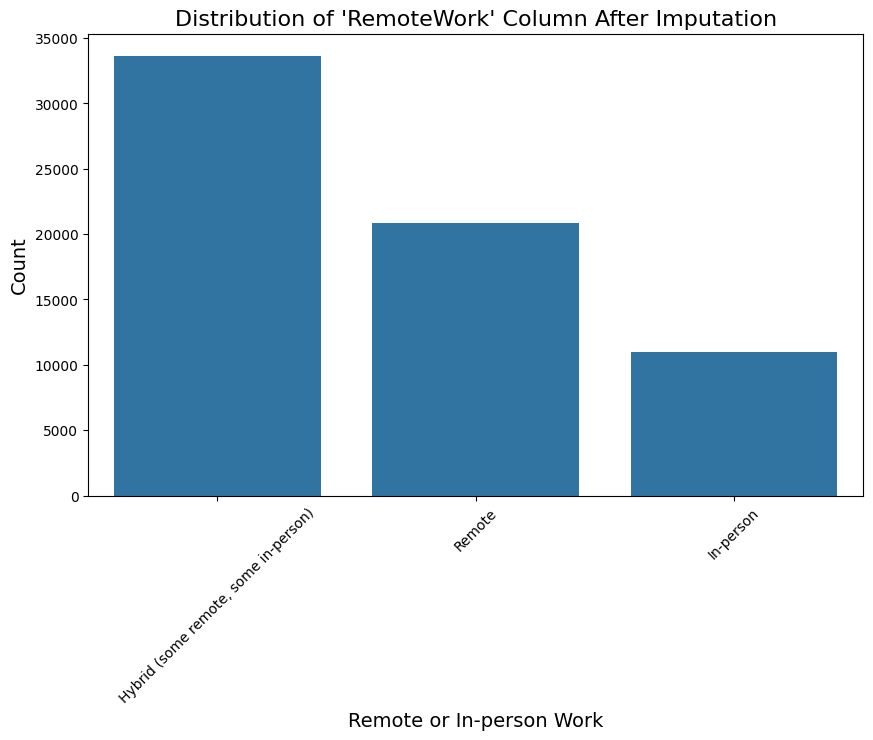

In [17]:
## Write your # Set the figure size
plt.figure(figsize=(10, 6))

# Plot the distribution of the 'RemoteWork' column
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index)

# Add labels and a title
plt.title("Distribution of 'RemoteWork' Column After Imputation", fontsize=16)
plt.xlabel("Remote or In-person Work", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotate x-axis labels for better readability (if necessary)
plt.xticks(rotation=45)

# Show the plot
plt.show() 

### Summary 


**In this lab, you focused on imputing missing values in the dataset.**

- Use the <code>pandas.read_csv()</code> function to load a dataset from a CSV file into a DataFrame.

- Download the dataset if it's not available online and specify the correct file path.



<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-09-27|1.1|Madhusudhan Moole|Updated lab|
|2024-09-26|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
